<a href="https://colab.research.google.com/github/hitminh/deep-learning-with-python-notebooks/blob/deep-learning-self-study/DL_Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hitminh","key":"7354e94d0cd8e91f9d07562e5bbbff90"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c dogs-vs-cats

 98% 798M/812M [00:05<00:00, 190MB/s]
100% 812M/812M [00:05<00:00, 162MB/s]


In [4]:
!unzip -qq dogs-vs-cats.zip

In [5]:
!unzip --qq train.zip

In [6]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir / fname,
                      dst=dir / fname)

make_subset("train",start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input( shape=(180, 180, 3) )
x = layers.Rescaling(1./255) (inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu") (x)
x = layers.Flatten() (x)
outputs = layers.Dense(1, activation="sigmoid") (x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [10]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180,180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180,180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180,180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [12]:
# import tensorflow as tf

# def save_model_checkpoint(epoch, logs):
#     if logs['val_loss'] < save_model_checkpoint.best_val_loss:
#         save_model_checkpoint.best_val_loss = logs['val_loss']
#         model.save_weights(new_base_dir / 'model_checkpoint')
#         print('Model checkpoint saved.')

# save_model_checkpoint.best_val_loss = float('inf')

callbacks = [
    keras.callbacks.ModelCheckpoint (
        filepath="convnet_from_scratch",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 20s 108ms/step - loss: 0.7168 - accuracy: 0.5175 - val_loss: 0.6921 - val_accuracy: 0.5040
Epoch 2/30
63/63 [==============================] - 5s 78ms/step - loss: 0.6942 - accuracy: 0.5235 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6894 - accuracy: 0.5545 - val_loss: 0.6745 - val_accuracy: 0.5770
Epoch 4/30
63/63 [==============================] - 6s 88ms/step - loss: 0.6735 - accuracy: 0.6045 - val_loss: 0.6579 - val_accuracy: 0.5710
Epoch 5/30
63/63 [==============================] - 7s 100ms/step - loss: 0.6446 - accuracy: 0.6165 - val_loss: 0.6231 - val_accuracy: 0.6590
Epoch 6/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6037 - accuracy: 0.6665 - val_loss: 0.5978 - val_accuracy: 0.6790
Epoch 7/30
63/63 [==============================] - 5s 84ms/step - loss: 0.5785 - accuracy: 0.6890 - val_loss: 0.5611 - val_accuracy: 0.6910
Epoch 8/30

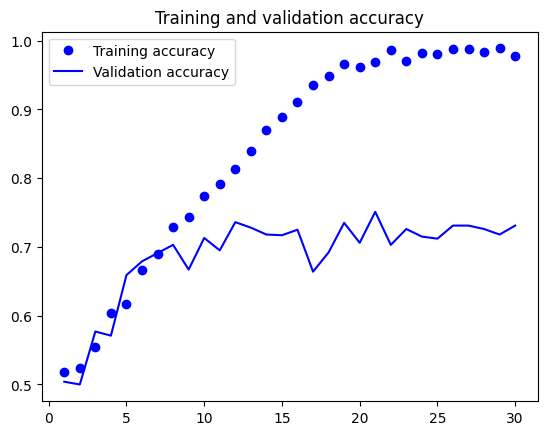

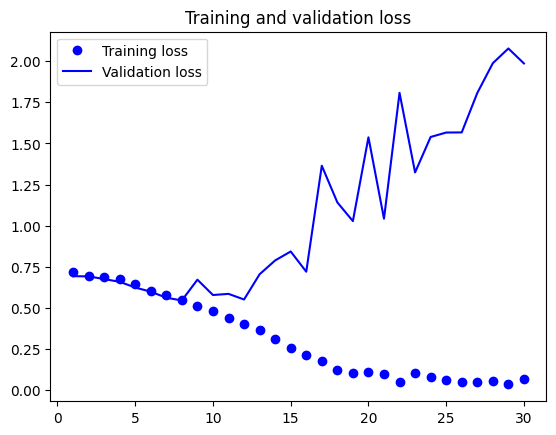

In [13]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [14]:
test_model = keras.models.load_model("convnet_from_scratch")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 45ms/step - loss: 0.5629 - accuracy: 0.7125
Test accuracy: 0.712


In [15]:
data_augmentation = keras.Sequential(
 [
 layers.RandomFlip("horizontal"),
 layers.RandomRotation(0.1),
 layers.RandomZoom(0.2),
 ]
)

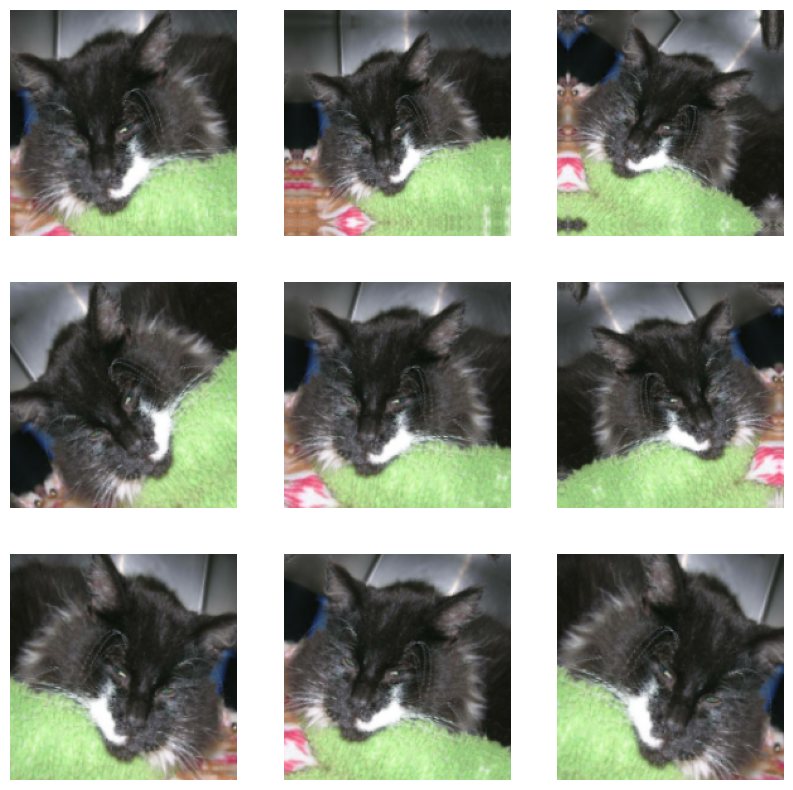

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")